In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE  # imblearn library can be installed in Visual Studio by going into Python Environment -> Install new package -> imblearn package
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [3]:
# Importing dataset and examining it
dataset = pd.read_csv("Marketing.csv")

In [4]:
# Top & Bottom 5 rows
print(dataset.head())
print(dataset.tail()) 

# Displays numbers of rows and columns
print(dataset.shape)

print(dataset.info())
print(dataset.describe())

#Checking for null values
dataset.isnull().sum()

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome subscribed  
0  unknown    5   may       261         1     -1         0  unknown         no  
1  unknown    5   may       151         1     -1         0  unknown         no  
2  unknown    5   may        76         1     -1         0  unknown         no  
3  unknown    5   may        92         1     -1         0  unknown         no  
4  unknown    5   may       198         1     -1         0  unknown         no  
       age           job   marital  education default  balance housin

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [5]:
# Converting Categorical features into Numerical features
dataset['job'] = dataset['job'].map({'admin.':1, 'blue-collar':2, 'entrepreneur':3,'housemaid':4, 'management':5,'retired':6, 'self-employed':7, 'services':8,'student':9,'technician':10,'unemployed':11,'unknown':12})
dataset['marital'] = dataset['marital'].map({'single':1, 'married':2, 'divorced':0})
dataset['education'] = dataset['education'].map({'primary':0, 'secondary':1, 'tertiary':2, 'unknown' :3})
dataset['default'] = dataset['default'].map({'yes':1, 'no':0})
dataset['housing'] = dataset['housing'].map({'yes':1, 'no':0})
dataset['loan'] = dataset['loan'].map({'yes':1, 'no':0})
dataset['contact'] = dataset['contact'].map({'cellular':1, 'telephone':2, 'unknown':0})
dataset['poutcome'] = dataset['poutcome'].map({'failure':0, 'other':1, 'success':2,'unknown':3})
dataset['subscribed'] = dataset['subscribed'].map({'yes':1, 'no':0})
dataset['month'] = dataset['month'].map({'jan':1, 'feb':2, 'mar':3,'apr':4, 'may':5,'jun':6, 'jul':7, 'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
print(dataset.head())
print(dataset.tail())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    5        2          2        0     2143        1     0        0   
1   44   10        1          1        0       29        1     0        0   
2   33    3        2          1        0        2        1     1        0   
3   47    2        2          3        0     1506        1     0        0   
4   33   12        1          3        0        1        0     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0    5      5       261         1     -1         0         3           0  
1    5      5       151         1     -1         0         3           0  
2    5      5        76         1     -1         0         3           0  
3    5      5        92         1     -1         0         3           0  
4    5      5       198         1     -1         0         3           0  
       age  job  marital  education  default  balance  housing  loan  contact  \
45206 

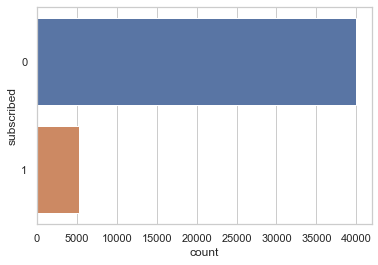

In [5]:
#Counting the data distribution of target variable
sns.set(style="whitegrid", color_codes=True)
sns.countplot(y='subscribed', data=dataset)

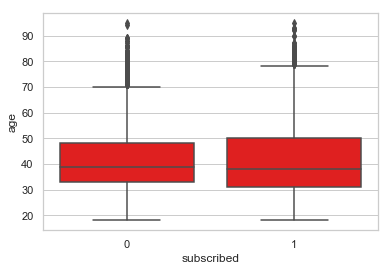

In [6]:
#Checking how many have subscribed w.r.t age
sns.boxplot(x='subscribed',y='age', data=dataset, color ='red')

In [7]:
# #Checking how many have subscribed w.r.t age
# plt.figure(figsize=(12, 6))
# sns.barplot(x='age',y='subscribed', data=dataset)

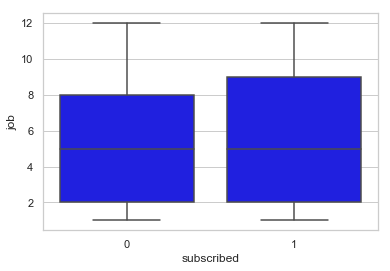

In [8]:
#Checking how many have subscribed w.r.t job
sns.boxplot(x='subscribed',y='job', data=dataset, color ='blue')

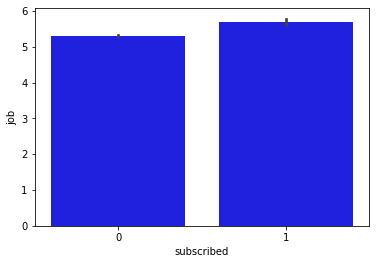

In [12]:
#Checking how many have subscribed w.r.t job
sns.barplot(x='subscribed',y='job', data=dataset, color ='blue')

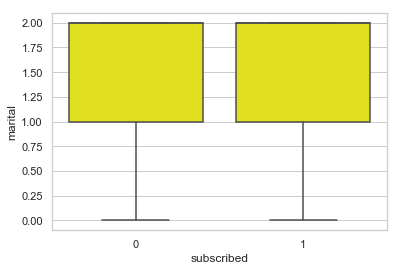

In [9]:
#Checking how many have subscribed w.r.t marital
sns.boxplot(x='subscribed',y='marital', data=dataset, color ='yellow')

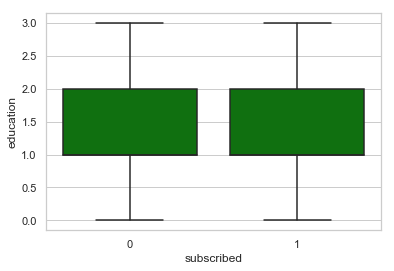

In [10]:
#Checking how many have subscribed w.r.t education
sns.boxplot(x='subscribed',y='education', data=dataset, color ='green')

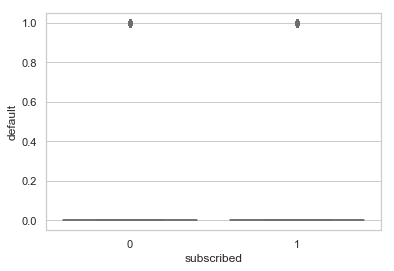

In [11]:
#Checking how many have subscribed w.r.t default
sns.boxplot(x='subscribed',y='default', data=dataset, color ='violet')

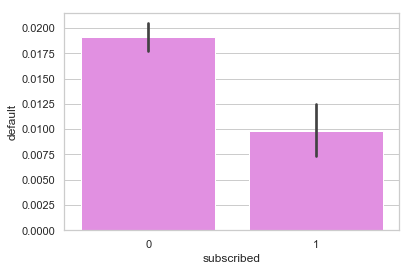

In [12]:
#Checking how many have subscribed w.r.t default
sns.barplot(x='subscribed',y='default', data=dataset, color ='violet')

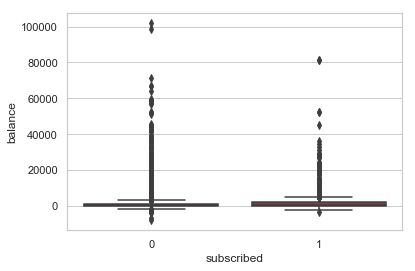

In [13]:
#Checking how many have subscribed w.r.t balance
sns.boxplot(x='subscribed',y='balance', data=dataset, color ='brown')

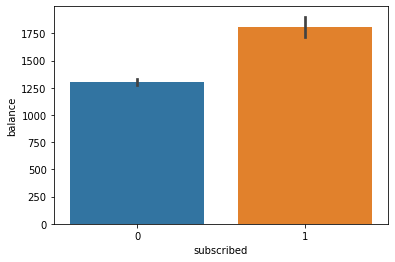

In [11]:
#Checking how many have subscribed w.r.t balance
sns.barplot(x='subscribed',y='balance', data=dataset)

In [14]:
# #Checking how many have subscribed w.r.t balance
# plt.figure(figsize=(12, 6))
# sns.barplot(x='balance',y='subscribed', data=dataset)

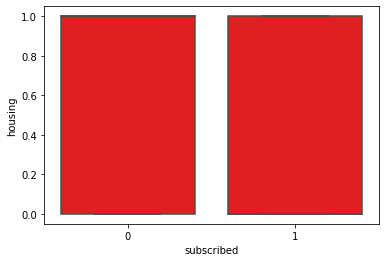

In [6]:
#Checking how many have subscribed w.r.t housing
sns.boxplot(x='subscribed',y='housing', data=dataset, color ='red')

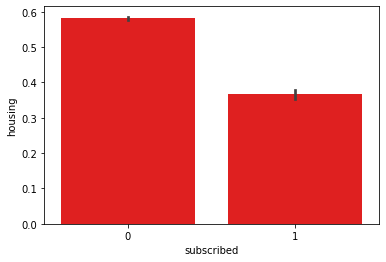

In [7]:
#Checking how many have subscribed w.r.t housing
sns.barplot(x='subscribed',y='housing', data=dataset, color ='red')

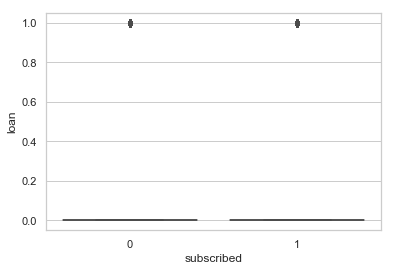

In [17]:
#Checking how many have subscribed w.r.t loan
sns.boxplot(x='subscribed',y='loan', data=dataset, color ='red')

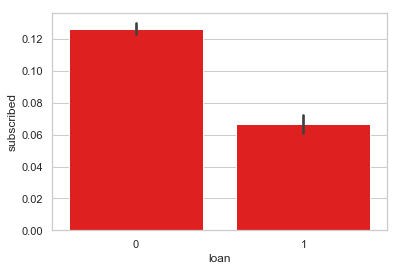

In [18]:
#Checking how many have subscribed w.r.t housing
sns.barplot(x='loan',y='subscribed', data=dataset, color ='red')

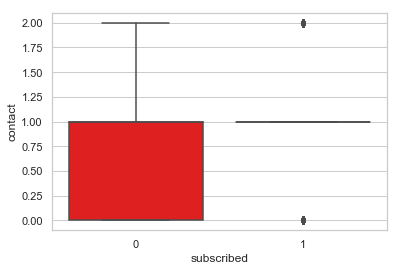

In [19]:
#Checking how many have subscribed w.r.t contact
sns.boxplot(x='subscribed',y='contact', data=dataset, color ='red')

In [20]:
# #Checking how many have subscribed w.r.t age
# sns.barplot(x='subscribed',y='contact', data=dataset, color ='red')

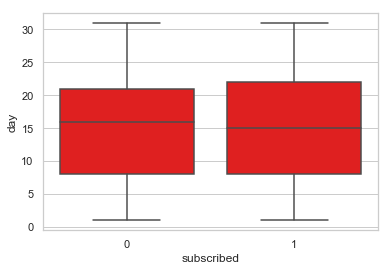

In [21]:
#Checking how many have subscribed w.r.t day
sns.boxplot(x='subscribed',y='day', data=dataset, color ='red')

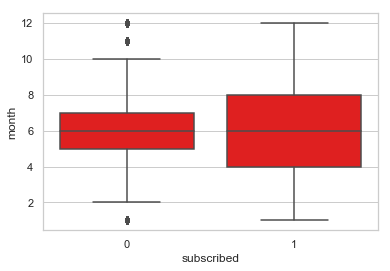

In [22]:
#Checking how many have subscribed w.r.t month
sns.boxplot(x='subscribed',y='month', data=dataset, color ='red')

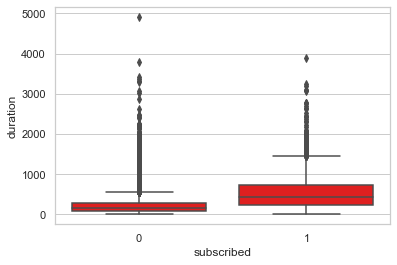

In [8]:
#Checking how many have subscribed w.r.t duration
sns.boxplot(x='subscribed',y='duration', data=dataset, color = 'red')

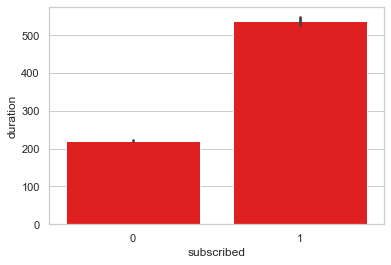

In [9]:
sns.barplot(x="subscribed", y="duration", data=dataset, color = 'red')

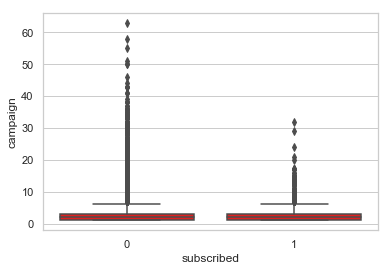

In [24]:
#Checking how many have subscribed w.r.t campaign
sns.boxplot(x='subscribed',y='campaign', data=dataset, color ='red')

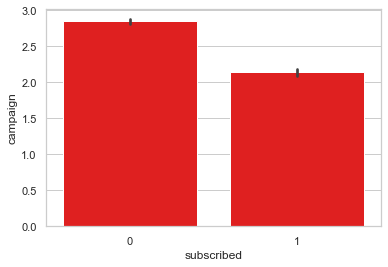

In [10]:
sns.barplot(x="subscribed", y="campaign", data=dataset, color = 'red')

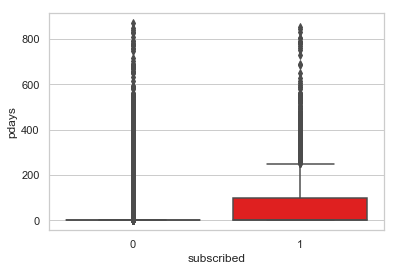

In [25]:
#Checking how many have subscribed w.r.t pdays
sns.boxplot(x='subscribed',y='pdays', data=dataset, color ='red')

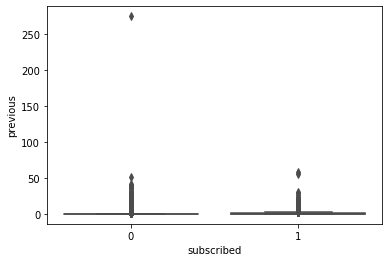

In [15]:
#Checking how many have subscribed w.r.t previous
sns.boxplot(x='subscribed',y='previous', data=dataset, color ='red')

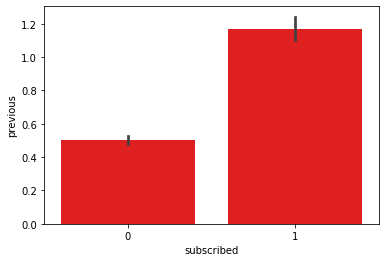

In [19]:
#Checking how many have subscribed w.r.t previous
sns.barplot(x='subscribed',y='previous', data=dataset, color ='red')

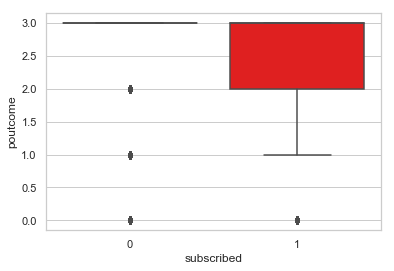

In [27]:
#Checking how many have subscribed w.r.t poutcome
sns.boxplot(x='subscribed',y='poutcome', data=dataset, color ='red')

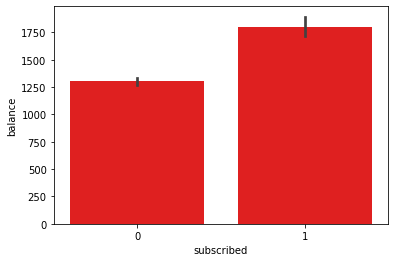

In [8]:
sns.barplot(x="subscribed", y="balance", data=dataset, color = 'red')

In [35]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap_final.html')

'corrheatmap_final.html'

In [36]:
dataset = dataset.drop('poutcome', axis = 1)

In [37]:
# Dividing dataset into label and feature sets
X = dataset.drop('subscribed', axis = 1) # Features
Y = dataset['subscribed'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(45211, 15)
(45211,)


In [38]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)
X_scaled

array([[ 1.60696496, -0.10381968,  0.74066636, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [ 0.28852927,  1.42400783, -0.70245839, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [-0.74738448, -0.71495069,  0.74066636, ..., -0.56935064,
        -0.41145311, -0.25194037],
       ...,
       [ 2.92540065,  0.20174582,  0.74066636, ...,  0.72181052,
         1.43618859,  1.05047333],
       [ 1.51279098, -1.02051619,  0.74066636, ...,  0.39902023,
        -0.41145311, -0.25194037],
       [-0.37068857, -0.71495069,  0.74066636, ..., -0.24656035,
         1.4761376 ,  4.52357654]])

In [39]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

print(X_train.shape)
print(X_test.shape)

(33908, 15)
(11303, 15)


In [40]:
# Implementing Oversampling to balance the dataset; SMOTE stands for Synthetic Minority Oversampling Technique
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())

Number of observations in each class before oversampling (training data): 
 0    29928
1     3980
Name: subscribed, dtype: int64
Number of observations in each class after oversampling (training data): 
 1    29928
0    29928
Name: subscribed, dtype: int64


In [41]:
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [50, 100, 150, 200, 250, 300,350]}

gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='recall', cv=5)

"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

gd_sr.fit(X_train, Y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

{'n_estimators': 200}
0.9652184531939048


duration     0.312483
month        0.110803
campaign     0.097279
balance      0.074142
day          0.071572
age          0.067653
contact      0.048788
job          0.046071
pdays        0.039044
previous     0.035814
housing      0.034250
education    0.031351
marital      0.020656
loan         0.009146
default      0.000949
dtype: float64


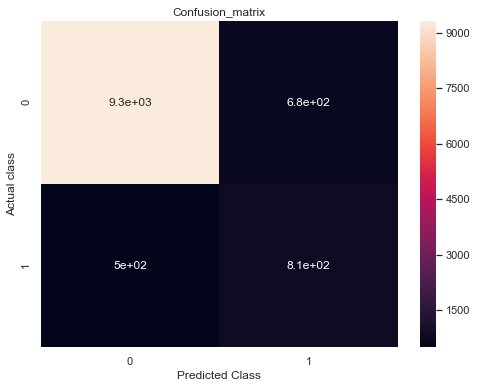

Confusion matrix: 
 [[9315  679]
 [ 499  810]]
TP:  810
TN:  9315
FP:  679
FN:  499


In [42]:
# Building random forest using the tuned parameter
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

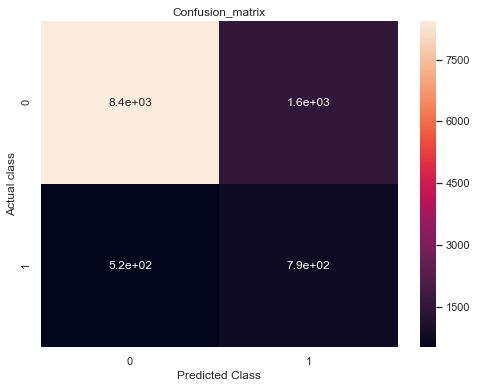

Confusion matrix: 
 [[8430 1564]
 [ 523  786]]
TP:  786
TN:  8430
FP:  1564
FN:  523


In [43]:
# Selecting features with higher sifnificance and redefining feature set
X = dataset[['duration', 'month', 'campaign','balance']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

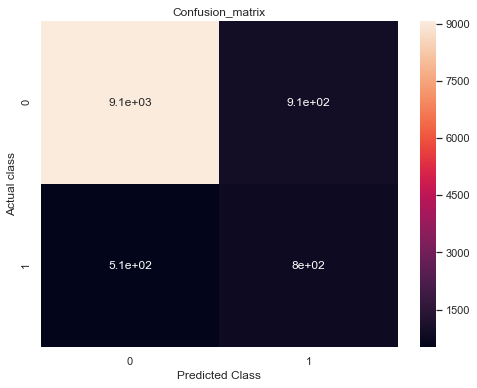

Confusion matrix: 
 [[9081  913]
 [ 508  801]]
TP:  801
TN:  9081
FP:  913
FN:  508


In [44]:
# Selecting features with higher sifnificance and redefining feature set
X = dataset[['duration', 'month', 'campaign','balance','day']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

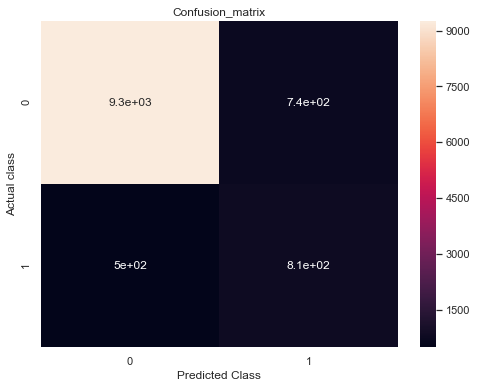

Confusion matrix: 
 [[9254  740]
 [ 499  810]]
TP:  810
TN:  9254
FP:  740
FN:  499


In [45]:
#Final Model
# Selecting features with higher sifnificance and redefining feature set
X = dataset[['duration', 'month', 'campaign','balance','day','age','contact']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

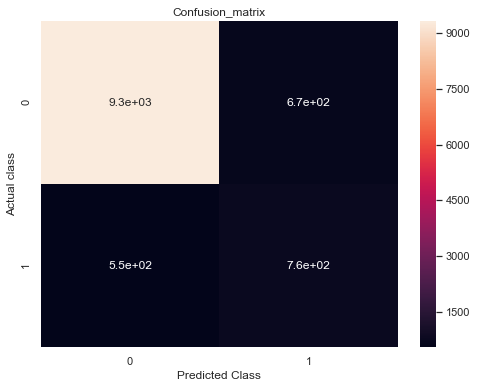

Confusion matrix: 
 [[9325  669]
 [ 547  762]]
TP:  762
TN:  9325
FP:  669
FN:  547


In [46]:
# Selecting features with higher sifnificance and redefining feature set
X = dataset[['duration', 'month', 'campaign','balance','day','age','contact','job']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

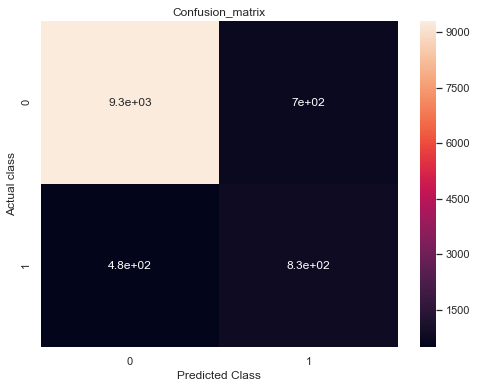

Confusion matrix: 
 [[9297  697]
 [ 483  826]]
TP:  826
TN:  9297
FP:  697
FN:  483


In [47]:
# Selecting features with higher sifnificance and redefining feature set
X = dataset[['duration', 'month', 'campaign','balance','day','age','contact','job','pdays']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

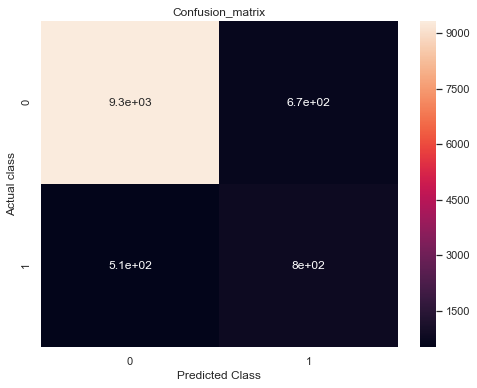

Confusion matrix: 
 [[9322  672]
 [ 510  799]]
TP:  799
TN:  9322
FP:  672
FN:  510


In [48]:
# Selecting features with higher sifnificance and redefining feature set
X = dataset[['duration', 'month', 'campaign','balance','day','age','contact','job','pdays','previous']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

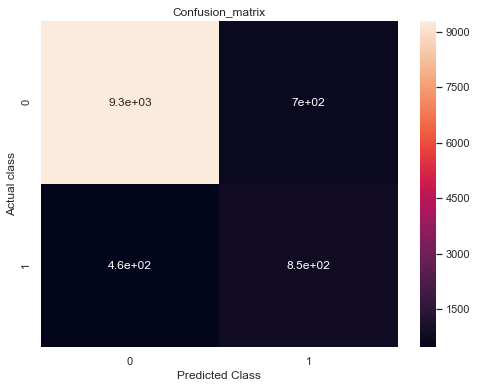

Confusion matrix: 
 [[9291  703]
 [ 462  847]]
TP:  847
TN:  9291
FP:  703
FN:  462


In [49]:
# Selecting features with higher sifnificance and redefining feature set
X = dataset[['duration', 'month', 'campaign','balance','day','age','contact','job','pdays','previous','housing']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.25, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])